# 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

* 何を学習し、何を予測するのか  
→電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測しています。 
* どのようなファイルを作りKaggleに提出するか  
→テストセットの各SK_ID_CURRについて、TARGET変数の確率を予測したファイル。（ファイルにはヘッダーが含まれる）
* 提出されたものはどういった指標値で評価されるのか  
→ROC曲線面積で評価する

# 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

# 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats

In [74]:
# データセットの準備
df = pd.read_csv("application_train.csv")

In [75]:
# データの情報
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# 欠損値の数
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [77]:
# データ型
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [78]:
# オブジェクト型の中身確認
# オブジェクトの列を抜き出し
df[df.columns[df.dtypes == "object"]]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [79]:
# オブジェクトの中身　ユニーク確認
for column in df.columns[df.dtypes == "object"]:
    print("オブジェクトのユニーク : {}".format(df[column].unique()))
    print("数 : {}\n".format(len(df[column].unique())))

オブジェクトのユニーク : ['Cash loans' 'Revolving loans']
数 : 2

オブジェクトのユニーク : ['M' 'F' 'XNA']
数 : 3

オブジェクトのユニーク : ['N' 'Y']
数 : 2

オブジェクトのユニーク : ['Y' 'N']
数 : 2

オブジェクトのユニーク : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
数 : 8

オブジェクトのユニーク : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
数 : 8

オブジェクトのユニーク : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
数 : 5

オブジェクトのユニーク : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
数 : 6

オブジェクトのユニーク : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
数 : 6

オブジェクトのユニーク : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Wait

In [80]:
# 欠損値の対応
# オブジェクトは最頻値で埋める
# 数字は平均値で埋める

# for + fillnaでオブジェクト欠損値を最頻値で埋める
# modeはの数値にアクセスするには[0]スライスが必要
df_obj = df.select_dtypes(include = ['object'])
for col_obj in df_obj.columns:
    df[col_obj] = df[col_obj].fillna(df_obj[col_obj].mode()[0])
    
# 数値の列名を取得
df_num = df.select_dtypes(include = ['float64', 'int64'])
for col_num in df_num.columns:
    df[col_num] = df[col_num].fillna(df_num[col_num].mean())

In [81]:
# obuject型の欠損値が埋められたか確認
df.select_dtypes(include = ['object']).isnull().sum().sum()

0

In [82]:
# 数字型の欠損値が埋められたか確認
df.select_dtypes(include = ['float64', 'int64']).isnull().sum().sum()

0

In [83]:
# 再度、欠損値の数を確認
df.isnull().sum().sum()

0

In [84]:
# 各オブジェクトをダミー処理
df_dummy = list(df.select_dtypes(include='object').columns)
df = pd.concat([df, pd.get_dummies(df[df_dummy])], axis = 1, sort = False)
df.drop(columns = df[df_dummy], inplace = True)

In [85]:
df.shape

(307511, 246)

In [86]:
# 分割
from sklearn.model_selection import train_test_split
# Xとyに分割
y = df[["TARGET"]].copy()
df.drop(columns = "TARGET", inplace = True)
X = df.copy()
# ndarray変換
X_array = X.values
# yに関して一次元化（グラフ化で必要）
# y_array = np.ravel(y.values)
# この段階で一次元化すると標準化できない
y_array = y.values

X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [87]:
# 各特徴量の標準化
from sklearn.preprocessing import StandardScaler
# X、yを分けてインスタンス化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_valid_std = scaler_X.transform(X_valid)
# yの標準化はしない・・・０、１だから
#y_train_std = scaler_y.fit_transform(y_train)
#y_valid_std = scaler_y.transform(y_valid)

# yの一次元化(ロジスティック回帰で必要)
y_train = np.ravel(y_train)
y_valid = np.ravel(y_valid)

In [88]:
# 分類機の関数
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ml_def(X_tr, y_tr, X_va, y_va, model):

    model.fit(X_tr, y_tr)
    if model in ["DecisionTreeRegressor"]:
        y_train_predict_model = model.predict(X_tr)
    else:
        y_train_predict_model = model.predict_proba(X_tr)
    # 一次元化
    y_train_predict_model = np.ravel(y_train_predict_model)
    # ROCによる評価
    # trainの結果
    fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_tr, y_train_predict_model)
    print('train\nfpr：', fpr_train_model)
    print('tpr：', tpr_train_model)
    print('thresholds：', thresholds_train_model)
    print("roc_auc_score : ", roc_auc_score(y_tr, y_train_predict_model))

    # validの結果
    y_valid_predict_model = model.predict(X_va)
    fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_va, y_valid_predict_model, drop_intermediate=False)
    print('\nvalid\nfpr：', fpr_valid_model)
    print('tpr：', tpr_valid_model)
    print('thresholds：', thresholds_valid_model)
    print("roc_auc_score : ", roc_auc_score(y_va, y_valid_predict_model))
    
    # trainのROC曲線
    plt.figure()
    plt.plot(fpr_train_model, tpr_train_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('TRAIN')
    plt.grid()
    
    # validのROC曲線
    plt.figure()
    plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('VALID')
    plt.grid();

train
fpr： [0. 0. 1.]
tpr： [0. 1. 1.]
thresholds： [2. 1. 0.]
roc_auc_score :  1.0

valid
fpr： [0.         0.08953621 1.        ]
tpr： [0.        0.1715646 1.       ]
thresholds： [2. 1. 0.]
roc_auc_score :  0.5410141946183739


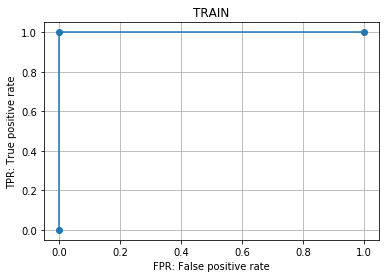

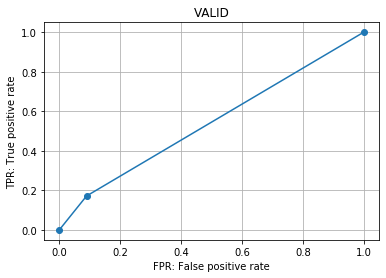

In [89]:
# 決定木
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree)

In [90]:
# 決定木　特徴量の重要度
fti_dtree = dtree.feature_importances_
# 特徴量の重要度　ソートで高いのサーチ
feat_dict_dtree = sorted(dict(zip(fti_dtree, df.columns)).items())
feat_dict_dtree

[(0.0, 'ORGANIZATION_TYPE_Religion'),
 (2.5734410931997365e-05, 'FLAG_DOCUMENT_7'),
 (3.62211596608394e-05, 'FLAG_DOCUMENT_15'),
 (4.610765748696714e-05, 'ORGANIZATION_TYPE_Industry: type 8'),
 (5.114919508356184e-05, 'ORGANIZATION_TYPE_Trade: type 5'),
 (5.2493353644854896e-05, 'FLAG_DOCUMENT_17'),
 (5.457683533628471e-05, 'ORGANIZATION_TYPE_Trade: type 4'),
 (5.6777701104387025e-05, 'NAME_EDUCATION_TYPE_Academic degree'),
 (8.740498855953766e-05, 'FLAG_DOCUMENT_13'),
 (0.0001017186012477384, 'HOUSETYPE_MODE_block of flats'),
 (0.00010324487999643251, 'ORGANIZATION_TYPE_Transport: type 1'),
 (0.00010517098124358898, 'ORGANIZATION_TYPE_Industry: type 13'),
 (0.00010584611105982757, 'FLAG_DOCUMENT_2'),
 (0.00010727070607697579, 'NAME_INCOME_TYPE_Unemployed'),
 (0.00012066919445893877, 'ORGANIZATION_TYPE_Industry: type 12'),
 (0.00012662613091555315, 'ORGANIZATION_TYPE_Industry: type 10'),
 (0.00013450950990885832, 'FLAG_DOCUMENT_14'),
 (0.00014921055796731806, 'FLAG_DOCUMENT_19'),
 (0.0

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 1.41576883e-05 1.00000000e+00]
tpr： [0.         0.81984627 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.9099160555638618

valid
fpr： [0.         0.00159634 1.        ]
tpr： [0.         0.00952225 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5039629538129605


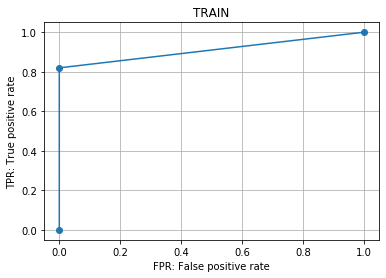

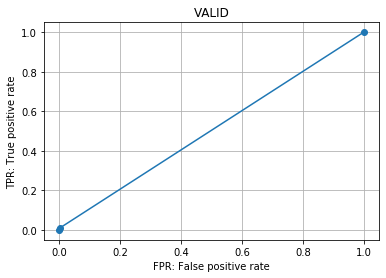

In [91]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc)

In [92]:
# ランダムフォレスト　特徴量の重要度
fti_rfc = rfc.feature_importances_
# 特徴量の重要度　ソートで高いのサーチ
feat_dict_rfc = sorted(dict(zip(fti_rfc, df.columns)).items())
feat_dict_rfc

[(0.0, 'NAME_FAMILY_STATUS_Unknown'),
 (1.5546283299116076e-05, 'ORGANIZATION_TYPE_Industry: type 8'),
 (1.8227302798985515e-05, 'FLAG_DOCUMENT_7'),
 (2.450716412998339e-05, 'ORGANIZATION_TYPE_Trade: type 5'),
 (2.7275644190448477e-05, 'FLAG_DOCUMENT_15'),
 (3.160403676191888e-05, 'ORGANIZATION_TYPE_Religion'),
 (3.36789265907779e-05, 'NAME_EDUCATION_TYPE_Academic degree'),
 (3.7201205944888054e-05, 'FLAG_DOCUMENT_17'),
 (3.8044544978628486e-05, 'ORGANIZATION_TYPE_Trade: type 4'),
 (4.319987846052001e-05, 'ORGANIZATION_TYPE_Industry: type 10'),
 (4.437121262898055e-05, 'ORGANIZATION_TYPE_Industry: type 12'),
 (4.703110890769142e-05, 'NAME_INCOME_TYPE_Maternity leave'),
 (5.7150219707172635e-05, 'FLAG_DOCUMENT_20'),
 (7.183086940879713e-05, 'ORGANIZATION_TYPE_Industry: type 13'),
 (7.40244414713769e-05, 'FLAG_DOCUMENT_21'),
 (7.402652750409612e-05, 'FLAG_DOCUMENT_2'),
 (7.842945553626027e-05, 'ORGANIZATION_TYPE_Transport: type 1'),
 (9.751825183985276e-05, 'FLAG_DOCUMENT_14'),
 (9.98886

決定木、ランダムフォレストともに過学習  
→木の深さに上限を設けて過学習防止

# 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

* どの特徴量を使うか
* どう前処理をするか

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 1.88769178e-05 3.30346061e-05 8.49461300e-05
 1.41576883e-04 1.84049948e-04 2.40680702e-04 2.50119161e-04
 3.16188373e-04 5.00238321e-04 5.14396009e-04 5.37992157e-04
 5.66307533e-04 6.08780598e-04 6.51253663e-04 8.35303612e-04
 8.77776677e-04 9.62722807e-04 9.86318954e-04 1.03823048e-03
 1.07598431e-03 1.11845738e-03 1.16564967e-03 1.29306887e-03
 1.35441885e-03 1.38273423e-03 1.41576883e-03 1.47711882e-03
 2.06230327e-03 2.21331861e-03 2.30770320e-03 2.34545703e-03
 2.41152625e-03 2.43984162e-03 2.51534929e-03 2.58613774e-03
 2.69939924e-03 2.77018768e-03 2.90232611e-03 3.90752198e-03
 4.34169109e-03 4.59181025e-03 4.73338713e-03 4.77114097e-03
 4.89384093e-03 5.01182167e-03 5.20059085e-03 5.23362545e-03
 7.05996725e-03 7.39031331e-03 7.48941713e-03 8.96653594e-03
 9.24025125e-03 9.57059731e-03 1.00094857e-02 1.00991510e-02
 1.02501664e-02 1.05427586e-02 1.06088278e-02 1.19490890e-02
 1.21378581e-

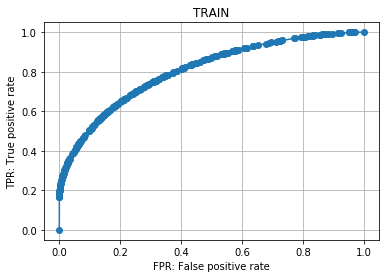

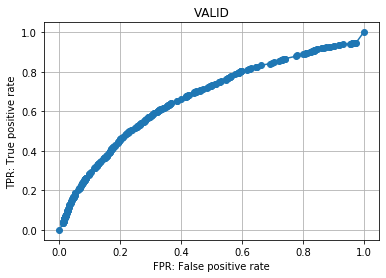

In [93]:
# DecisionTreeRegressor max_depth=15
dtree_depth15 = DecisionTreeRegressor(max_depth=15)
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree_depth15)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 9.43845889e-06 1.00000000e+00]
tpr： [0.        0.1739084 1.       ]
thresholds： [2 1 0]
roc_auc_score :  0.5869494816886726

valid
fpr： [0.0000000e+00 4.9444107e-04 1.0000000e+00]
tpr： [0.         0.00262683 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5010661926977943


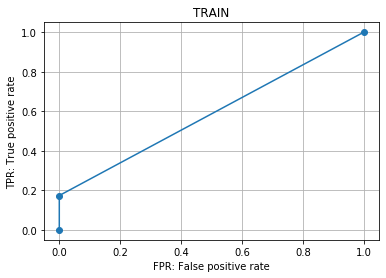

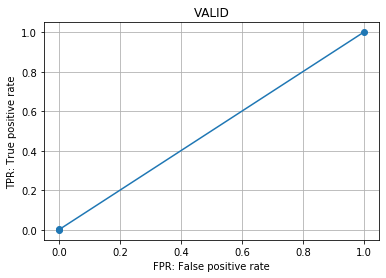

In [94]:
# ランダムフォレスト　max_depth=20
rfc_20 = RandomForestClassifier(max_depth=20)
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc_20)

* 決定木で多少効果あり
* ランダムフォレストでは効果なし  
→決定木に対しグリッドサーチ

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 1.41576883e-05
 7.07884417e-05 1.27419195e-04 1.36857654e-04 1.51015342e-04
 1.79330719e-04 1.98207637e-04 2.31242243e-04 2.68996078e-04
 1.02879202e-03 1.09014200e-03 1.10901892e-03 1.15149198e-03
 1.34969962e-03 1.37801500e-03 1.45352267e-03 1.49127650e-03
 2.44928008e-03 3.23739140e-03 3.32705676e-03 3.66684128e-03
 4.96462938e-03 5.33744850e-03 5.47902538e-03 1.09722085e-02
 1.10949084e-02 1.12128892e-02 1.13072737e-02 1.13497468e-02
 1.15998660e-02 1.16470583e-02 1.18027928e-02 1.26616926e-02
 1.36810462e-02 1.38934115e-02 1.50354650e-02 1.57716648e-02
 1.58660494e-02 1.71260837e-02 2.20435207e-02 2.92639418e-02
 3.03682415e-02 3.04862222e-02 4.26712726e-02 4.48232413e-02
 5.23834468e-02 5.24212007e-02 5.84948490e-02 6.05949061e-02
 6.09866021e-02 6.12084059e-02 6.60267392e-02 6.65033813e-02
 6.67204659e-02 1.11515392e-01 1.15800452e-01 1.17376675e-01
 1.25555099e-01 1.26829291e-01 1.29830721e-01 1.60977636e-01
 1.61072020e-

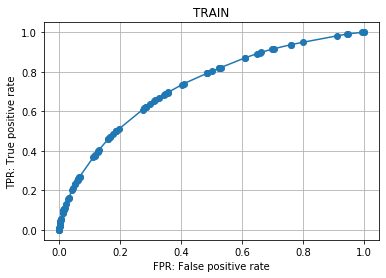

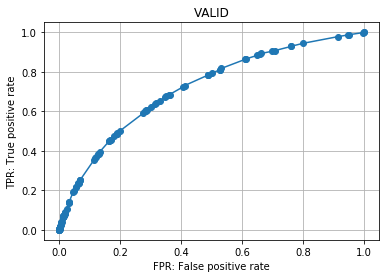

In [30]:
# learning, GridSearchCV、決定木
import sklearn
diparameter_dtree={"min_samples_leaf":[i for i in range(1, 9, 1)], "max_depth":[i for i in range(2, 12, 1)], "random_state":[123],}
# "criterion":["gini", "entropy"], 
licv_dtree=sklearn.model_selection.GridSearchCV(DecisionTreeRegressor(),
                                                param_grid=diparameter_dtree, cv=5, n_jobs=-1,scoring='roc_auc')
licv_dtree.fit(X_train_std, y_train)
predictor_dtree=licv_dtree.best_estimator_

# trainの予測
y_train_predict_licv_dtree=predictor_dtree.predict(X_train_std)
# trainのROCによる評価
fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_train, y_train_predict_licv_dtree)
print('train\nfpr：', fpr_train_model)
print('tpr：', tpr_train_model)
print('thresholds：', thresholds_train_model)
print("roc_auc_score : ", roc_auc_score(y_train, y_train_predict_licv_dtree))

# trainの予測
y_valid_predict_licv_dtree=predictor_dtree.predict(X_valid_std)
# validのROCによる評価
fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_valid, y_valid_predict_licv_dtree, drop_intermediate=False)
print('\nvalid\nfpr：', fpr_valid_model)
print('tpr：', tpr_valid_model)
print('thresholds：', thresholds_valid_model)
print("roc_auc_score : ", roc_auc_score(y_valid, y_valid_predict_licv_dtree))
     
# trainのROC曲線
plt.figure()
plt.plot(fpr_train_model, tpr_train_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('TRAIN')
plt.grid()

# validのROC曲線
plt.figure()
plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('VALID')
plt.grid();

# 4. printing parameters of the predictor
print(sorted(predictor_dtree.get_params(True).items()))

# 5. printing importances of the predictor
print(predictor_dtree.feature_importances_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,31.468650,0.170639,0.655280,0.174161,2,1,123,"{'max_depth': 2, 'min_samples_leaf': 1, 'rando...",0.65489,0.64757,0.642447,0.639003,0.655697,0.647922,0.006613,73
1,27.954185,4.483700,0.882858,0.428808,2,2,123,"{'max_depth': 2, 'min_samples_leaf': 2, 'rando...",0.65489,0.64757,0.642447,0.639003,0.655697,0.647922,0.006613,73
2,22.369067,0.060312,1.250035,0.053541,2,3,123,"{'max_depth': 2, 'min_samples_leaf': 3, 'rando...",0.65489,0.64757,0.642447,0.639003,0.655697,0.647922,0.006613,73
3,22.167226,0.276821,0.600722,0.396193,2,4,123,"{'max_depth': 2, 'min_samples_leaf': 4, 'rando...",0.65489,0.64757,0.642447,0.639003,0.655697,0.647922,0.006613,73
4,22.091730,0.308184,0.552707,0.250510,2,5,123,"{'max_depth': 2, 'min_samples_leaf': 5, 'rando...",0.65489,0.64757,0.642447,0.639003,0.655697,0.647922,0.006613,73


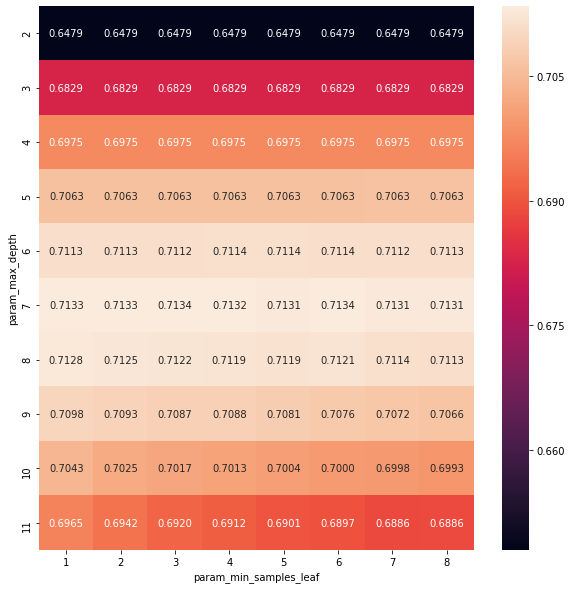

In [62]:
# スコア表示
score_df = pd.DataFrame(licv_dtree.cv_results_)
display(score_df.head())
# スコアのヒートマップ
ex_score_df = score_df.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score')
plt.figure(figsize=(10, 10))
sns.heatmap(ex_score_df, cbar=True, annot=True, square=True,
            fmt='.4f', annot_kws={'size':10});

* 過学習が改善された  
→これでテスト

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 1.41576883e-05
 7.07884417e-05 1.27419195e-04 1.36857654e-04 1.51015342e-04
 1.79330719e-04 1.98207637e-04 2.31242243e-04 2.68996078e-04
 1.02879202e-03 1.09014200e-03 1.10901892e-03 1.15149198e-03
 1.34969962e-03 1.37801500e-03 1.45352267e-03 1.49127650e-03
 2.44928008e-03 3.23739140e-03 3.32705676e-03 3.66684128e-03
 4.96462938e-03 5.33744850e-03 5.47902538e-03 1.09722085e-02
 1.10949084e-02 1.12128892e-02 1.13072737e-02 1.13497468e-02
 1.15998660e-02 1.16470583e-02 1.18027928e-02 1.26616926e-02
 1.36810462e-02 1.38934115e-02 1.50354650e-02 1.57716648e-02
 1.58660494e-02 1.71260837e-02 2.20435207e-02 2.92639418e-02
 3.03682415e-02 3.04862222e-02 4.26712726e-02 4.48232413e-02
 5.23834468e-02 5.24212007e-02 5.84948490e-02 6.05949061e-02
 6.09866021e-02 6.12084059e-02 6.60267392e-02 6.65033813e-02
 6.67204659e-02 1.11515392e-01 1.15800452e-01 1.17376675e-01
 1.25555099e-01 1.26829291e-01 1.29830721e-01 1.60977636e-01
 1.61072020e-

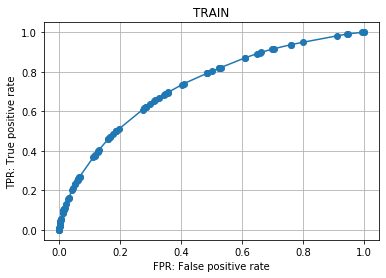

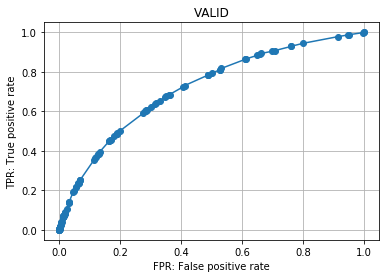

In [95]:
# 前処理なしで決定木
# ハイパーパラメータはグリッドサーチで最良の値
dtree_7_6 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=6)
ml_def(X_train, y_train, X_valid, y_valid, dtree_7_6)

In [205]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, np.round(dtree_7_6.predict(X_train), 0), labels=[1, 0]))

[[   422  18312]
 [   244 211655]]


In [199]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [202]:
dtree_7_6.predict(X_train)

array([0.05183708, 0.07879429, 0.07047581, ..., 0.16163222, 0.07903123,
       0.05732634])

In [204]:
np.round(dtree_7_6.predict(X_train), 0)

array([0., 0., 0., ..., 0., 0., 0.])

* 決定木の場合、スコアは標準化に関係ない

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.00000000e+00 9.43845889e-06 1.00000000e+00]
tpr： [0. 0. 1.]
thresholds： [2 1 0]
roc_auc_score :  0.49999528077055577

valid
fpr： [0. 1.]
tpr： [0. 1.]
thresholds： [1 0]
roc_auc_score :  0.5


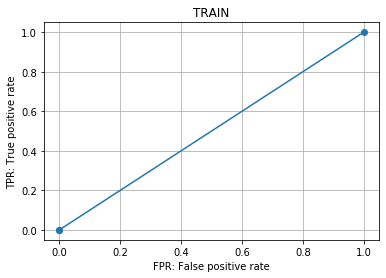

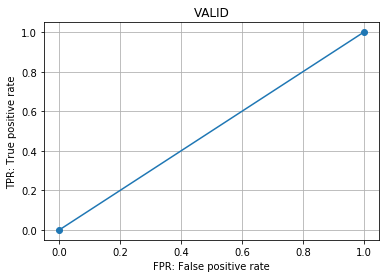

In [96]:
# ロジスティック回帰も比較のため実施
# 標準化なし
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0)
ml_def(X_train, y_train, X_valid, y_valid, lreg)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.         0.00117509 1.        ]
tpr： [0.         0.01281093 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5058179219318465

valid
fpr： [0.        0.0011019 1.       ]
tpr： [0.         0.01149237 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5051952342722832


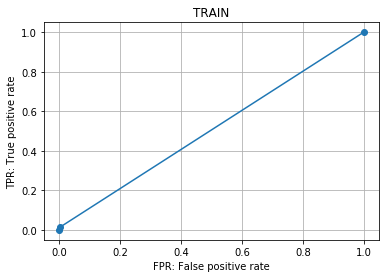

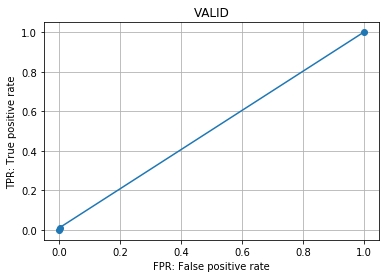

In [97]:
# ロジスティック回帰も比較のため実施
# 標準化あり
lreg_std = LogisticRegression(random_state=0)
ml_def(X_train_std, y_train, X_valid_std, y_valid, lreg_std)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.         0.00124116 1.        ]
tpr： [0.         0.01291769 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5058382662090506

valid
fpr： [0.         0.00107364 1.        ]
tpr： [0.         0.01231325 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5056198027951881
経過時間：116.06089496612549


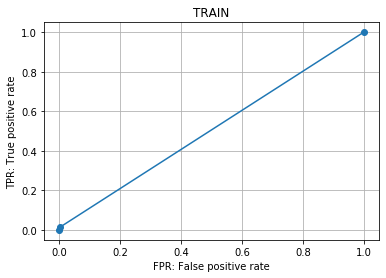

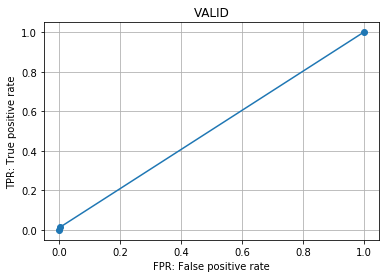

In [105]:
# ロジスティック回帰のハイパーパラメータ調整
# 時間測定
# diparameter_dtree={"penalty":['l1', 'l2'], "C":[10 ** i for i in range(-4, 5)], "random_state":[123],}

import time
t1 = time.time() 

lreg_std_parameter = LogisticRegression(random_state=0, penalty="l2", C=10**5)
ml_def(X_train_std, y_train, X_valid_std, y_valid, lreg_std_parameter)

t2 = time.time()
# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.00000000e+00 5.04957551e-04 1.00000000e+00]
tpr： [0.         0.00485748 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5021762604155106

valid
fpr： [0.00000000e+00 6.49836834e-04 1.00000000e+00]
tpr： [0.         0.00426859 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5018093780858138


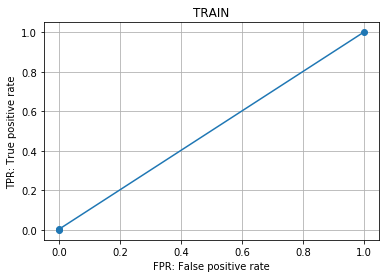

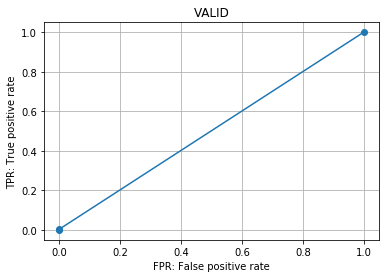

In [99]:
# 決定木で重要度が高い上位１０の特徴量でロジスティック

# 上位10個の列番号を取得（feat_dict_dtreeが昇順の重要度リスト）
columns_num = []
for value, column in feat_dict_dtree[-10:]:
    columns_num.append(X.columns.get_loc(column))
# 取得した列番号を使用し標準化後のXから必要列のみ抽出
X_train_std_feat10 = X_train_std[:, columns_num]
X_valid_std_feat10 = X_valid_std[:, columns_num]

# 「重要度の高い特徴量」のみでロジスティック
lreg_std_feat10 = LogisticRegression()
ml_def(X_train_std_feat10, y_train, X_valid_std_feat10, y_valid, lreg_std_feat10)

In [106]:
# 特徴量を3次まで増加
# 全てに適応すると計算コスト高いので、重要度の高い特徴量１０列

t1 = time.time() 

from sklearn.preprocessing import PolynomialFeatures
# 二次元へ
poly = PolynomialFeatures(degree=3)
X_train_feat10_poly = poly.fit_transform(X_train_std_feat10)
X_valid_feat10_poly = poly.fit_transform(X_valid_std_feat10)

t2 = time.time()
# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

経過時間：1.9608540534973145


/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.00000000e+00 6.70130581e-04 1.00000000e+00]
tpr： [0.        0.0113697 1.       ]
thresholds： [2 1 0]
roc_auc_score :  0.5053497857823763

valid
fpr： [0.00000000e+00 9.18247701e-04 1.00000000e+00]
tpr： [0.        0.0070596 1.       ]
thresholds： [2 1 0]
roc_auc_score :  0.503070674212291
経過時間：237.18749713897705


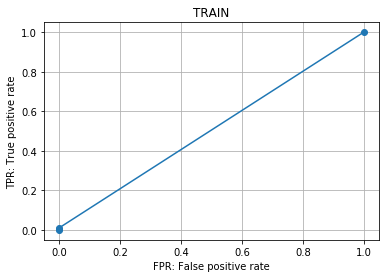

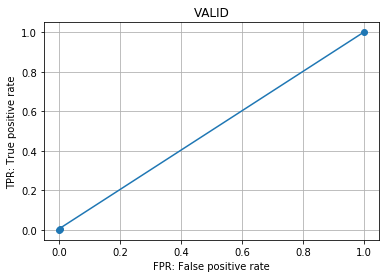

In [107]:
t1 = time.time() 

# 特徴量を3次 ロジスティック回帰
lreg_std_feat10_poly = LogisticRegression()
ml_def(X_train_feat10_poly, y_train, X_valid_feat10_poly, y_valid, lreg_std_feat10_poly)

t2 = time.time()
# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

In [112]:
# gitのコピー
df_g= pd.read_csv("application_train.csv", index_col = "SK_ID_CURR")

In [113]:
df_freq = pd.crosstab(df_g['TARGET'], columns='count', normalize = True)
print(df_freq)
df_g = pd.get_dummies(df_g) #simple one hot encoding
df_g = df_g.dropna(axis = 0)

col_0      count
TARGET          
0       0.919271
1       0.080729


In [114]:
features_g = [x for x in df_g.columns if x != "TARGET"]
X_g = np.array(df_g[features_g])
y_g = np.array(df_g["TARGET"])
X_g_train, X_g_test, y_g_train, y_g_test = train_test_split(X_g, y_g, test_size=0.25, random_state=1)

print("X Train Shape: {}".format(X_g_train.shape))
print("X Test Shape: {}".format(X_g_test.shape))

X Train Shape: (8513, 244)
X Test Shape: (2838, 244)


/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0. 1.]
tpr： [0. 1.]
thresholds： [1 0]
roc_auc_score :  0.5

valid
fpr： [0. 1.]
tpr： [0. 1.]
thresholds： [1 0]
roc_auc_score :  0.5


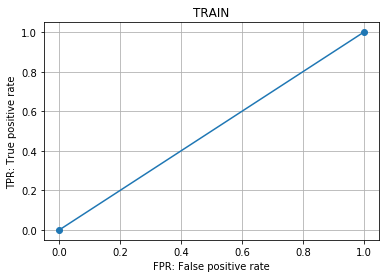

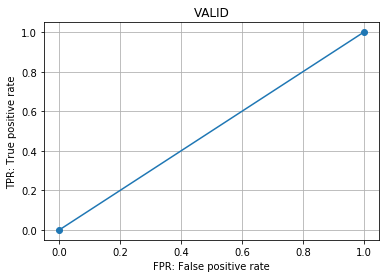

In [116]:
logreg = LogisticRegression()
ml_def(X_g_train, y_g_train, X_g_test, y_g_test, logreg)

In [117]:
# logreg.fit(X_g_train, y_g_train)
logreg.score(X_g_test, y_g_test)

0.9418604651162791

In [150]:
# gitのデータを使用
# Stratified K-Fold CV で性能を評価する
# ロジスティック回帰
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
# diparameter_dtree={"penalty":['l1', 'l2'], "C":[10 ** i for i in range(-4, 5)], "random_state":[123],}
logreg_skf = LogisticRegression(C=10**-1, penalty='l1')
# Stratified K-Fold CV、roc_auc
skf = StratifiedKFold(shuffle=True)
scoring = {'auc': 'roc_auc',}
# 'acc': 'accuracy', 
scores = cross_validate(logreg_skf, X_g_train, y_g_train, cv=skf, scoring=scoring)

# print('Accuracy (mean):', scores['test_acc'].mean())
print('AUC (mean):', scores['test_auc'].mean())
print(scores)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC (mean): 0.7445784596519659
{'fit_time': array([0.71872711, 0.69268799, 0.65605712]), 'score_time': array([0.00228691, 0.0024631 , 0.00230193]), 'test_auc': array([0.73111643, 0.7647503 , 0.73786865])}


In [152]:
# 自分で前処理したデータでも確認

# Stratified K-Fold CV で性能を評価する
# ロジスティック回帰
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_validate
# diparameter_dtree={"penalty":['l1', 'l2'], "C":[10 ** i for i in range(-4, 5)], "random_state":[123],}
logreg_skf_mine = LogisticRegression(C=10**-1, penalty='l1')
# Stratified K-Fold CV、roc_auc
skf = StratifiedKFold(shuffle=True)
scoring = {'auc': 'roc_auc',}
# 'acc': 'accuracy', 
scores = cross_validate(logreg_skf_mine, X_train_std, y_train, cv=skf, scoring=scoring)

# print('Accuracy (mean):', scores['test_acc'].mean())
print('AUC (mean):', scores['test_auc'].mean())
print(scores)

# ml_def(X_train_std, y_train, X_valid_std, y_valid, lreg_std)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC (mean): 0.7437616017732261
{'fit_time': array([31.43097425, 32.69912291, 50.47779417]), 'score_time': array([0.04506087, 0.04600501, 0.04715395]), 'test_auc': array([0.74185232, 0.74058789, 0.74884459])}


In [184]:
# 自分で前処理したデータでも確認
# 重要度の高い特徴量でKホールド
logreg_skf_mine_feat10 = LogisticRegression(C=10**-1, penalty='l1')
# Stratified K-Fold CV、roc_auc
skf = StratifiedKFold(shuffle=True)
scoring = {'auc': 'roc_auc',}
# 'acc': 'accuracy', 
scores = cross_validate(logreg_skf_mine_feat10, X_train_std_feat10, y_train, cv=skf, scoring=scoring, return_estimator=True)

# print('Accuracy (mean):', scores['test_acc'].mean())
print('AUC (mean):', scores['test_auc'].mean())
print(scores)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC (mean): 0.7220923917575858
{'fit_time': array([0.29869723, 0.25670195, 0.24509311]), 'score_time': array([0.01931787, 0.02640295, 0.02517509]), 'estimator': (LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.         0.         0.         ... 0.99938178 0.99938178 1.        ]
tpr： [0.00000000e+00 5.33788833e-05 1.60136650e-04 ... 9.99946621e-01
 1.00000000e+00 1.00000000e+00]
thresholds： [1.66594112 0.66594112 0.63962395 ... 0.0084656  0.00845645 0.00519353]
roc_auc_score :  0.7225090592919529

valid
fpr： [0.         0.         0.         ... 0.99997175 0.99998587 1.        ]
tpr： [0.00000000e+00 1.64176654e-04 3.28353308e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
thresholds： [1.64044196 0.64044196 0.63486263 ... 0.00655193 0.00625853 0.0057306 ]
roc_auc_score :  0.7218017632503533


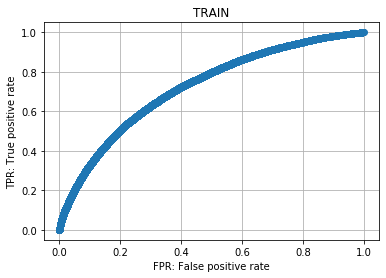

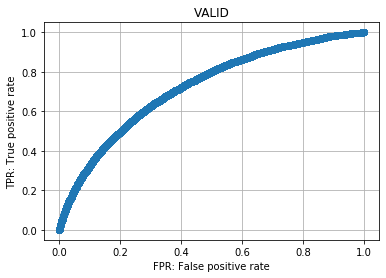

In [208]:
# グラフ化 　→　ロジスティック回帰の結果は確率だから正誤表で出力されない？
# →逆にロジスティック回帰だと０、１の結果でroc_aucが以上になる！！
# →predict_probaを使用　＋　クラス１に絞るy_predict[:, 1]

# 自分で前処理したデータでも確認
# 重要度の高い特徴量でKホールド
logreg_skf_mine_feat10 = LogisticRegression(C=10**-1, penalty='l1')
logreg_skf_mine_feat10.fit(X_train_std_feat10, y_train)
# trainの予測
y_train_predict_licv_logreg=logreg_skf_mine_feat10.predict_proba(X_train_std_feat10)
# trainのROCによる評価
fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_train, y_train_predict_licv_logreg[:, 1])
print('train\nfpr：', fpr_train_model)
print('tpr：', tpr_train_model)
print('thresholds：', thresholds_train_model)
print("roc_auc_score : ", roc_auc_score(y_train, y_train_predict_licv_logreg[:, 1]))

# trainの予測
y_valid_predict_licv_logreg=logreg_skf_mine_feat10.predict_proba(X_valid_std_feat10)
# validのROCによる評価
fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_valid, y_valid_predict_licv_logreg[:, 1], drop_intermediate=False)
print('\nvalid\nfpr：', fpr_valid_model)
print('tpr：', tpr_valid_model)
print('thresholds：', thresholds_valid_model)
print("roc_auc_score : ", roc_auc_score(y_valid, y_valid_predict_licv_logreg[:, 1]))
     
# trainのROC曲線
plt.figure()
plt.plot(fpr_train_model, tpr_train_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('TRAIN')
plt.grid()

# validのROC曲線
plt.figure()
plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('VALID')
plt.grid();

In [154]:
# グリッドサーチ　全特徴量　＋　重要特徴量 + ポリ

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train
fpr： [0.00000000e+00 5.00238321e-04 1.00000000e+00]
tpr： [0.        0.0048041 1.       ]
thresholds： [2 1 0]
roc_auc_score :  0.5021519305885758

valid
fpr： [0.00000000e+00 6.49836834e-04 1.00000000e+00]
tpr： [0.         0.00426859 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5018093780858138
[('C', 0.1), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 100), ('multi_class', 'warn'), ('n_jobs', None), ('penalty', 'l1'), ('random_state', 3), ('solver', 'warn'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)]


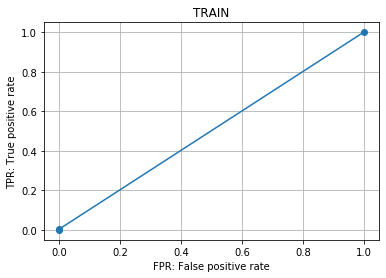

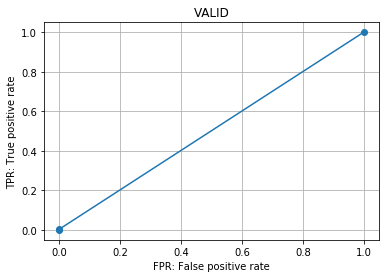

In [187]:
# グリッドサーチ、重要な特徴量
diparameter_logreg={"penalty":['l1', 'l2'], "C":[0.1, 1, 10], "random_state":[3],}
licv_logreg=sklearn.model_selection.GridSearchCV(LogisticRegression(),
                                                param_grid=diparameter_logreg, cv=5, n_jobs=-1, scoring='roc_auc')
licv_logreg.fit(X_train_std_feat10, y_train)
predictor_logreg=licv_logreg.best_estimator_


#ml_def(X_train_std_feat10, y_train, X_valid_std_feat10, y_valid, lreg_std_feat10)

# trainの予測
y_train_predict_licv_logreg=predictor_logreg.predict(X_train_std_feat10)
# trainのROCによる評価
fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_train, y_train_predict_licv_logreg)
print('train\nfpr：', fpr_train_model)
print('tpr：', tpr_train_model)
print('thresholds：', thresholds_train_model)
print("roc_auc_score : ", roc_auc_score(y_train, y_train_predict_licv_logreg))

# trainの予測
y_valid_predict_licv_logreg=predictor_logreg.predict(X_valid_std_feat10)
# validのROCによる評価
fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_valid, y_valid_predict_licv_logreg, drop_intermediate=False)
print('\nvalid\nfpr：', fpr_valid_model)
print('tpr：', tpr_valid_model)
print('thresholds：', thresholds_valid_model)
print("roc_auc_score : ", roc_auc_score(y_valid, y_valid_predict_licv_logreg))
     
# trainのROC曲線
plt.figure()
plt.plot(fpr_train_model, tpr_train_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('TRAIN')
plt.grid()

# validのROC曲線
plt.figure()
plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('VALID')
plt.grid();

# 4. printing parameters of the predictor
print(sorted(predictor_logreg.get_params(True).items()))

# 5. printing importances of the predictor
# print(predictor_logreg.feature_importances_)

In [188]:
pd.DataFrame(licv_logreg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.914024,0.114104,0.026688,0.001975,0.1,l1,3,"{'C': 0.1, 'penalty': 'l1', 'random_state': 3}",0.724762,0.722595,0.711717,0.729809,0.723030,0.722383,0.005917,1
1,0.877506,0.166648,0.021389,0.000440,0.1,l2,3,"{'C': 0.1, 'penalty': 'l2', 'random_state': 3}",0.724760,0.722569,0.711706,0.729823,0.723015,0.722374,0.005923,2
2,0.825090,0.014329,0.022570,0.001063,1,l1,3,"{'C': 1, 'penalty': 'l1', 'random_state': 3}",0.724759,0.722568,0.711706,0.729821,0.723016,0.722374,0.005923,3
3,0.759182,0.078921,0.020189,0.001388,1,l2,3,"{'C': 1, 'penalty': 'l2', 'random_state': 3}",0.724760,0.722565,0.711706,0.729823,0.723014,0.722373,0.005923,4
4,0.803291,0.041801,0.021201,0.000764,10,l1,3,"{'C': 10, 'penalty': 'l1', 'random_state': 3}",0.724760,0.722565,0.711705,0.729822,0.723014,0.722373,0.005923,5
5,0.546393,0.039035,0.013942,0.001593,10,l2,3,"{'C': 10, 'penalty': 'l2', 'random_state': 3}",0.724760,0.722564,0.711706,0.729822,0.723014,0.722373,0.005923,6


In [189]:
licv_logreg.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'random_state': [3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)>

In [190]:
predictor_logreg

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=3, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)